#  <span style='color:Blue'> Assignment 6 - Varshini Srinivas</span>
## IE590 Information Engineering Homework <br>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import random as rd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
from sklearn.cluster import KMeans #for K-Means
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #for Linear Discriminant Analysis
from sklearn.tree import DecisionTreeClassifier #for Decision Tree classification
from sklearn.model_selection import train_test_split #to Split arrays or matrices into random train and test subsets
from sklearn.model_selection import KFold #K-Folds cross-validator
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #for Support Vector Machine classification
from sklearn.preprocessing import StandardScaler  #for standaradizing data
from sklearn.decomposition import PCA #for Principal component analysis (PCA)

### <span style='color:Green'> Wisconsin Breast Cancer Database </span>

url: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

<b>Data</b> in file:<br>
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

<b>Column Names</b> in file under <i>'7. Attribute information'</i>:<br> 
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

The first two columns give:

    Sample ID_
    Classes, i.e. Diagnosis (M = malignant, B = benign)

For each cell nucleus, the following ten characteristics were measured:

    Radius (mean of all distances from the center to points on the perimeter)
    Texture (standard deviation of gray-scale values)
    Perimeter
    Area
    Smoothness (local variation in radius lengths)
    Compactness (perimeter^2 / area - 1.0)
    Concavity (severity of concave portions of the contour)
    Concave points (number of concave portions of the contour)
    Symmetry
    Fractal dimension (“coastline approximation” - 1)

For each characteristic, three measures are given:

    Mean
    Standard error
    Extreme / Largest/ orst”

In [2]:
# Load the Wisconsin Breast Cancer Database and review shape
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pd.read_csv(url)

# Review dataset dimensions
print(dataset.shape)

(568, 32)


In [3]:
# Add column names to dataset from wdbc.names
dataset.columns = ['ID', 'diagnosis_M_or_B', 'radius_Mean',
       'texture_Mean', 'perimeter_Mean', 'area_Mean',
       'smoothness_Mean', 'compactness_Mean', 'concavity_Mean',
       'concave_points_Mean', 'symmetry_Mean', 'fractal_dimension_Mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE',
       'smoothness_SE', 'compactness_SE', 'concavity_SE',
       'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
       'radius_Extreme', 'texture_Extreme', 'perimeter_Extreme',
       'area_Extreme', 'smoothness_Extreme', 'compactness_Extreme',
       'concavity_Extreme', 'concave_points_Extreme', 'symmetry_Extreme',
       'fractal_dimension_Extreme']

In [4]:
# Reindex dataset to move the dependent 'diagnosis' column to the end
dataset = dataset.reindex(columns= ['ID', 'radius_Mean',
       'texture_Mean', 'perimeter_Mean', 'area_Mean',
       'smoothness_Mean', 'compactness_Mean', 'concavity_Mean',
       'concave_points_Mean', 'symmetry_Mean', 'fractal_dimension_Mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE',
       'smoothness_SE', 'compactness_SE', 'concavity_SE',
       'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
       'radius_Extreme', 'texture_Extreme', 'perimeter_Extreme',
       'area_Extreme', 'smoothness_Extreme', 'compactness_Extreme',
       'concavity_Extreme', 'concave_points_Extreme', 'symmetry_Extreme',
       'fractal_dimension_Extreme','diagnosis_M_or_B'])

In [5]:
# Review Wisconsin Breast Cancer Database data
dataset.head(1)

,ID,radius_Mean,texture_Mean,perimeter_Mean,area_Mean,smoothness_Mean,compactness_Mean,concavity_Mean,concave_points_Mean,symmetry_Mean,...,texture_Extreme,perimeter_Extreme,area_Extreme,smoothness_Extreme,compactness_Extreme,concavity_Extreme,concave_points_Extreme,symmetry_Extreme,fractal_dimension_Extreme,diagnosis_M_or_B
0,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,M


# 1 Assignment 6

## 1.1 Assignment 6A

For Problems 1–4 use the dataset in the Wisconsin Breast Cancer Database.

### 1. This problem has two parts.

#### Part I:

(a) Construct a soft linear classifier for diagnosing tumors using all of the thirty
features. Present your Linear Programming formulation and your linear classifier.
Test your classifier using 10-fold cross validation. Present the sensitivity and
specificity of your classifier.

(b) Repeat part (a) for linear classifier with decision tree.

### 2.  SVM classifier

(a) Construct a soft SVM classifier for diagnosing tumors using using all of the thirty
features: Present your Nonlinear Programming formulation and your classifier. Test
your classifier using 10-fold cross validation. Present the sensitivity and specificity of
your classifier.

In [6]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:31]
y = array[:,31]
#print(X)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
print(X.shape)
print(y.shape)

(568, 30)
(568,)


In [8]:
# Dataset has different scales for Mean, SE and Extreme and we need to standardise data 
stdScalar= StandardScaler().fit(X_train)
X_train = stdScalar.transform(X_train)
X_validation= stdScalar.transform(X_validation)


 Model 1 - Logistic Regression: 0.978068 (0.016966)

 Confusion Matrix :
 [[276   1]
 [  5 172]]

 Accuracy :  0.986784140969163

 Sensitivity :  0.9963898916967509

 Specificity :  0.9717514124293786


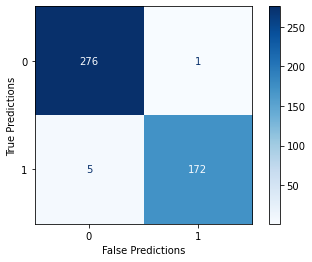


 Model 2 - Linear Discriminant Analysis: 0.958309 (0.036096)

 Confusion Matrix :
 [[276   1]
 [ 15 162]]

 Accuracy :  0.9647577092511013

 Sensitivity :  0.9963898916967509

 Specificity :  0.9152542372881356


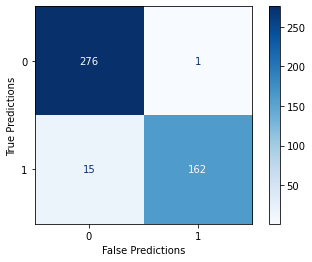


 Model 3 - Decision Tree Classifier: 0.945072 (0.037915)

 Confusion Matrix :
 [[277   0]
 [  0 177]]

 Accuracy :  1.0

 Sensitivity :  1.0

 Specificity :  1.0


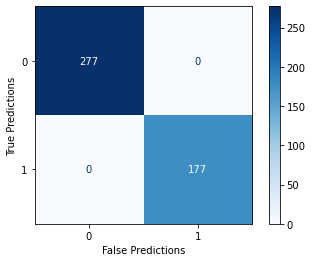


 Model 4 - Support vector machines (SVMs): 0.975845 (0.026836)

 Confusion Matrix :
 [[277   0]
 [  7 170]]

 Accuracy :  0.9845814977973568

 Sensitivity :  1.0

 Specificity :  0.96045197740113


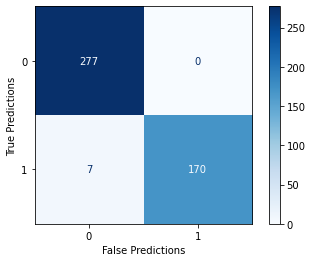

In [8]:
# Code block inspired by https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Check Algorithms 
models = []
models.append(('Model 1 - Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Model 2 - Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Model 3 - Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Model 4 - Support vector machines (SVMs)', SVC(gamma='auto')))

# Evaluate each Model in turn
results = []
names = []

for name, model in models:   
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('\n %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	model.fit(X_train, Y_train)
	print('\n Confusion Matrix :\n', confusion_matrix(Y_train, model.predict(X_train)))
    
	cm1 = confusion_matrix(Y_train, model.predict(X_train)) 
	total1=sum(sum(cm1))
    
	# from confusion matrix calculate accuracy
	accuracy1=(cm1[0,0]+cm1[1,1])/total1
	print ('\n Accuracy : ', accuracy1)

	sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
	print('\n Sensitivity : ', sensitivity1 )

	specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
	print('\n Specificity : ', specificity1)
    
	# Plot Confusion Matrix
	classifiers = model.fit(X_train, Y_train)
	disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
	disp = disp.plot(include_values=classifiers, cmap=plt.cm.Blues)
	plt.xlabel('False Predictions')
	plt.ylabel('True Predictions')
	plt.show()

# 1 Assignment 6

## 1.1 Assignment 6A

For Problems 1–4 use the dataset in the Wisconsin Breast Cancer Database.

### 1. This problem has two parts.

#### Part II:

(a) Construct a soft linear classifier for diagnosing tumors using only the following
three features:
    i. Extreme value of area
    ii. Extreme value of smoothness
    iii. Mean value of texture.

Present your Linear Programming formulation and your linear classifier. Test
your classifier using 10-fold cross validation. Present the sensitivity and speci-
ficity of your classifier.

(b) Repeat part (a) for linear classifier with decision tree.

### 2.  SVM classifier

(b) Construct a soft SVM classifier for diagnosing tumors using using only the following
three features:
    i. Extreme value of area
    ii. Extreme value of smoothness
    iii. Mean value of texture.

In [9]:
df_Part_2 = dataset[['texture_Mean', 'area_Extreme', 'smoothness_Extreme','diagnosis_M_or_B']]

In [10]:
# Split-out validation dataset
array = df_Part_2.values
X = array[:,0:3]
y = array[:,3]
#print(X)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Dataset has different scales for Mean, SE and Extreme and we need to standardise data 
stdScalar= StandardScaler().fit(X_train)
X_train = stdScalar.transform(X_train)
X_validation= stdScalar.transform(X_validation)


 Model 1 - Logistic Regression: 0.962560 (0.022284)

 Confusion Matrix :
 [[273   4]
 [ 11 166]]

 Accuracy :  0.9669603524229075

 Sensitivity :  0.9855595667870036

 Specificity :  0.9378531073446328


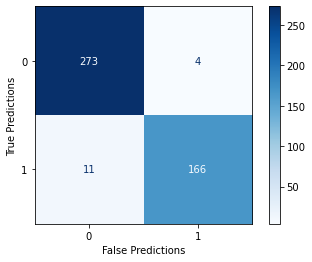


 Model 2 - Linear Discriminant Analysis: 0.929662 (0.041149)

 Confusion Matrix :
 [[276   1]
 [ 32 145]]

 Accuracy :  0.9273127753303965

 Sensitivity :  0.9963898916967509

 Specificity :  0.8192090395480226


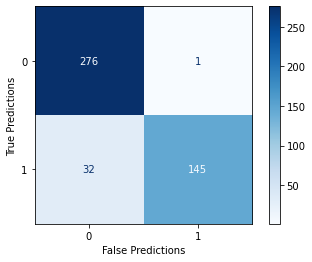


 Model 3 - Decision Tree Classifier: 0.938309 (0.035496)

 Confusion Matrix :
 [[277   0]
 [  0 177]]

 Accuracy :  1.0

 Sensitivity :  1.0

 Specificity :  1.0


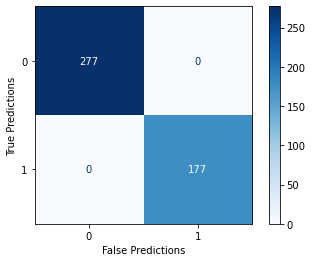


 Model 4 - Support vector machines (SVMs): 0.962560 (0.028083)

 Confusion Matrix :
 [[273   4]
 [ 11 166]]

 Accuracy :  0.9669603524229075

 Sensitivity :  0.9855595667870036

 Specificity :  0.9378531073446328


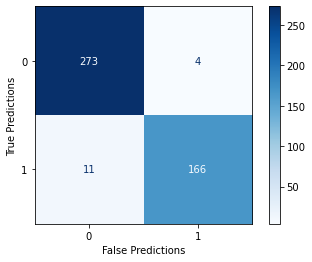

In [12]:
# Check Algorithms
models = []
models.append(('Model 1 - Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Model 2 - Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Model 3 - Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Model 4 - Support vector machines (SVMs)', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
cmt = []
classifiers = []
k = []
c = []
for name, model in models:   
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('\n %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	model.fit(X_train, Y_train)
	print('\n Confusion Matrix :\n', confusion_matrix(Y_train, model.predict(X_train)))
    
	cm1 = confusion_matrix(Y_train, model.predict(X_train)) 
	total1=sum(sum(cm1))
	# from confusion matrix calculate accuracy
	accuracy1=(cm1[0,0]+cm1[1,1])/total1
	print ('\n Accuracy : ', accuracy1)

	sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
	print('\n Sensitivity : ', sensitivity1 )

	specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
	print('\n Specificity : ', specificity1)
    
	# Plot Confusion Matrix
	classifiers = model.fit(X_train, Y_train)
	disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
	disp = disp.plot(include_values=classifiers, cmap=plt.cm.Blues)
	plt.xlabel('False Predictions')
	plt.ylabel('True Predictions')
	plt.show()

# 1 Assignment 6

## 1.1 Assignment 6A

### 3. Using PCA (Principal Components Analysis) on the thirty features in the WBCD dataset
identify the top three components. Construct a linear and an SVM classifier using the
three components you identified. Present the details of your classifiers. Perform 10-fold
cross-validation for each of the classifiers and present the sensitivity and specificity.

In [13]:
# Prepare dataset for Principal Components Analysis (PCA)
df_pca = dataset[['radius_Mean',
       'texture_Mean', 'perimeter_Mean', 'area_Mean',
       'smoothness_Mean', 'compactness_Mean', 'concavity_Mean',
       'concave_points_Mean', 'symmetry_Mean', 'fractal_dimension_Mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE',
       'smoothness_SE', 'compactness_SE', 'concavity_SE',
       'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
       'radius_Extreme', 'texture_Extreme', 'perimeter_Extreme',
       'area_Extreme', 'smoothness_Extreme', 'compactness_Extreme',
       'concavity_Extreme', 'concave_points_Extreme', 'symmetry_Extreme',
       'fractal_dimension_Extreme']]

# Scale and transform data for PCA
scaler = StandardScaler()
scaler.fit(df_pca)
X_scaled = scaler.transform(df_pca)
X_scaled.shape

(568, 30)

In [14]:
# Run Principal component analysis (PCA)
pca30 = PCA(n_components=30,random_state=2000)
# Calculate mean and standard deviation
pca30.fit(X_scaled)
# Transform the Values
X_pca30 = pca30.transform(X_scaled)

In [15]:
# Check Variance explained by all the components
print("Variance explained by all 30 principal components =",sum(pca30.explained_variance_ratio_ * 100))

Variance explained by all 30 principal components = 99.99999999999997


In [16]:
# Variance % explained by each of the 30 components
df_p = pd.DataFrame(pca30.explained_variance_ratio_ * 100)
df_p.columns = ['Variance% explained by each component']
df_p.index += 1
df_p.T

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Variance% explained by each component,44.140602,19.056427,9.44075,6.55707,5.511958,4.037225,2.238306,1.59329,1.396761,1.171086,...,0.100531,0.092134,0.081672,0.060591,0.052027,0.027287,0.022733,0.005333,0.002495,0.00043


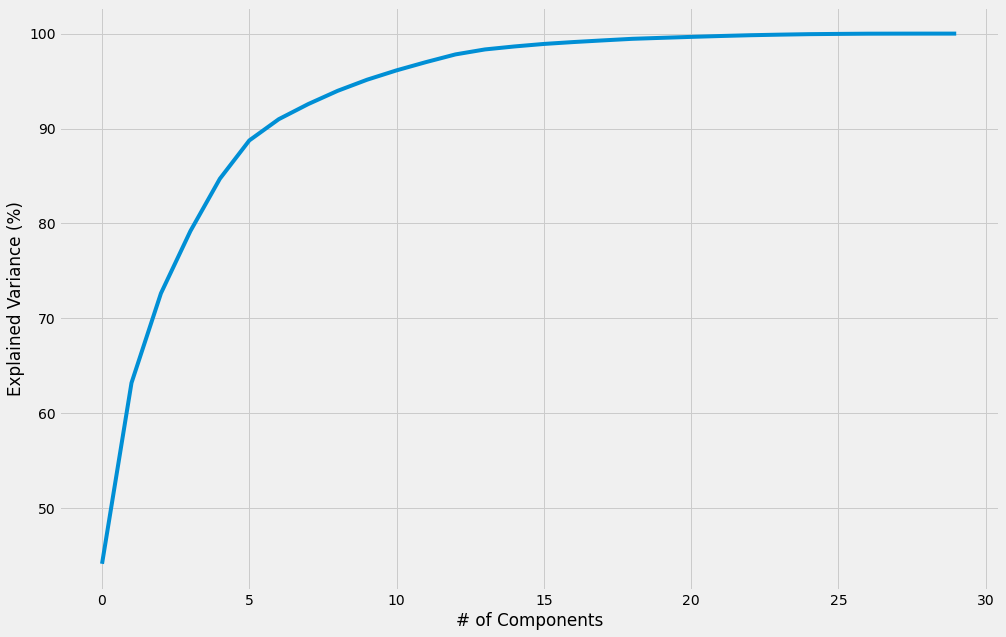

In [17]:
# Choose the number of components to describe the data by looking at the
# cumulative explained variance ratio as a function of the number of components
pca30.explained_variance_ratio_ * 100
pca30_cumsum = np.cumsum(pca30.explained_variance_ratio_ * 100)
pca30_cumsum
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(pca30_cumsum)
plt.ylabel('Explained Variance (%)')
plt.xlabel('# of Components')
plt.show()

In [18]:
# Data for KMeans
df_KMeans = dataset[['radius_Mean','smoothness_Mean']]


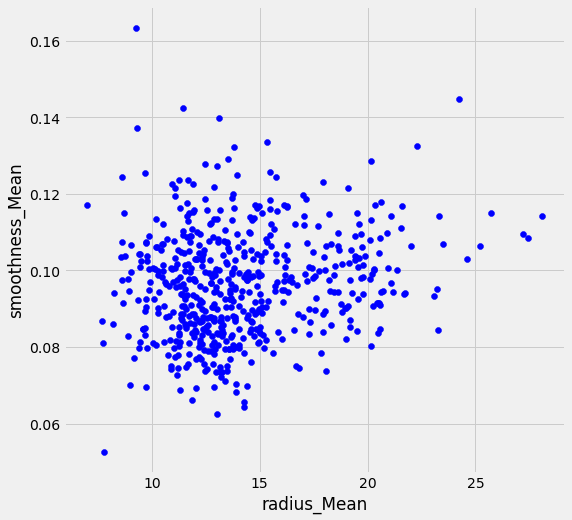

In [19]:
viridis = cm.get_cmap('viridis', 8)
X = df_KMeans
fig=plt.figure(figsize=(8,8))
#Visualise data points
plt.scatter(X["radius_Mean"],X["smoothness_Mean"],c='blue')
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

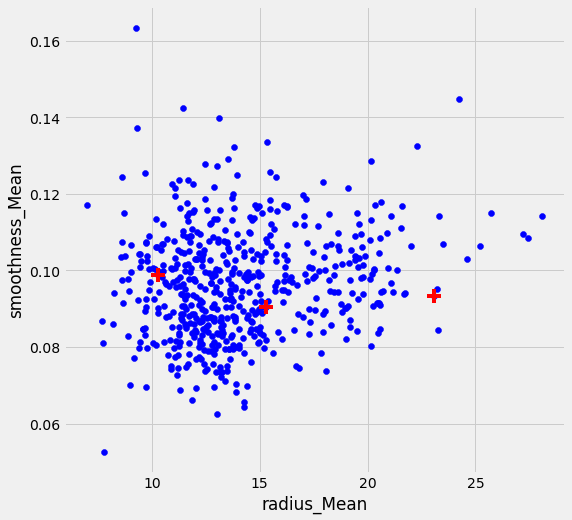

In [20]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
fig=plt.figure(figsize=(8,8))
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["radius_Mean"],X["smoothness_Mean"],c='blue')
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+', s=200)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

In [21]:
# Code block from https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["radius_Mean"]-row_d["radius_Mean"])**2
            d2=(row_c["smoothness_Mean"]-row_d["smoothness_Mean"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['radius_Mean'] - Centroids['radius_Mean']).sum() + (Centroids_new['smoothness_Mean'] - Centroids['smoothness_Mean']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.49260260631117264
-0.36507043157340063
-0.20513227680037915
-0.13810250276475972
-0.11222135183688538
-0.09715584694944136
-0.01451406636635133
-0.014494924552742358
-0.0434057853627189
-0.0962121148520018
-0.1192995179715194
-0.05720859886852034
-0.09484760688022724
-0.0801543549473063
-0.06559508382685997
-0.014231556721059926
-0.014236569229237564
0.0


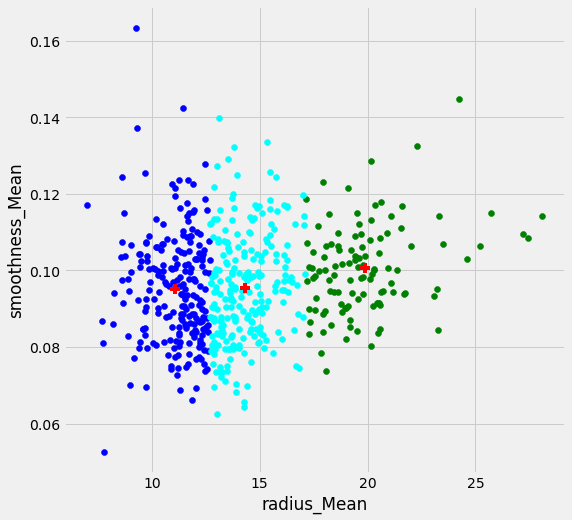

In [22]:
color=['blue','green','cyan']
fig=plt.figure(figsize=(8,8))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["radius_Mean"],data["smoothness_Mean"],c=color[k])
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+',s=100)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

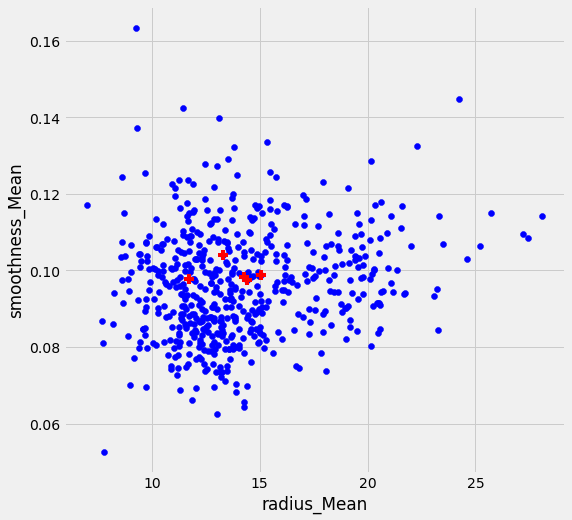

In [23]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
fig=plt.figure(figsize=(8,8))
#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["radius_Mean"],X["smoothness_Mean"],c='blue')
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+', s=100)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

In [24]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["radius_Mean"]-row_d["radius_Mean"])**2
            d2=(row_c["smoothness_Mean"]-row_d["smoothness_Mean"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['radius_Mean'] - Centroids['radius_Mean']).sum() + (Centroids_new['smoothness_Mean'] - Centroids['smoothness_Mean']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1.3047029833701589
0.48166775334027123
0.22952189600996376
0.2256852414393528
0.30954555294102976
0.2450310520671981
0.3090025714344851
0.15496664311702352
0.11067189752606749
0.16749979394813203
0.38745915622776284
0.11138715639589954
0.15965280154845213
0.1352627124388981
0.15850824252538898
0.19807372154088204
0.1611019609729366
0.27559682963955046
0.31317811168908827
0.2756429775962668
0.06991557481232165
0.021045409738545823
0.0


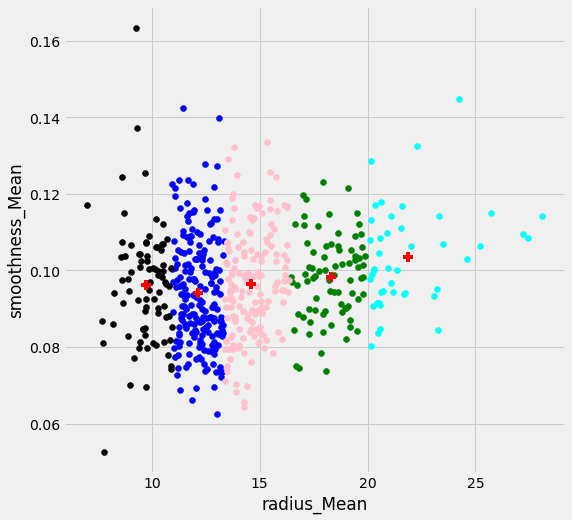

In [25]:
color=['blue','green','cyan','pink','black']
fig=plt.figure(figsize=(8,8))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["radius_Mean"],data["smoothness_Mean"],c=color[k])
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+', s=100)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

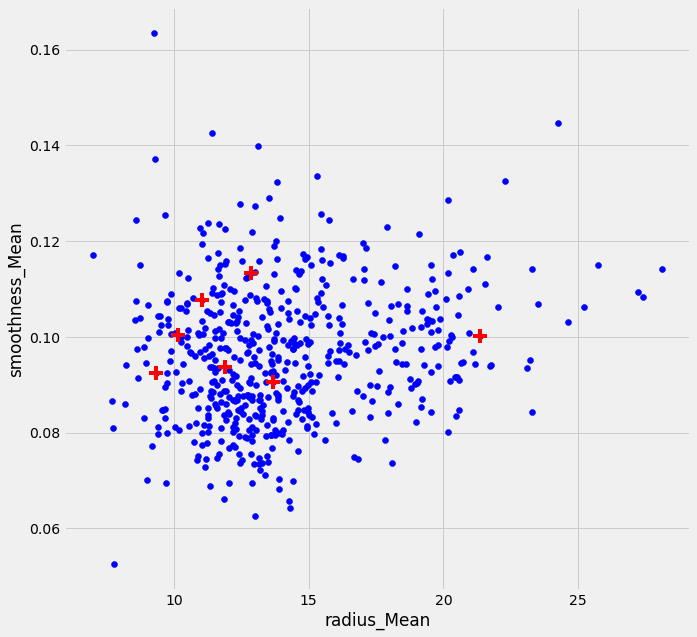

In [26]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
fig=plt.figure(figsize=(10,10))
#number of clusters
K=7

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["radius_Mean"],X["smoothness_Mean"],c='blue')
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+', s=200)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

In [27]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["radius_Mean"]-row_d["radius_Mean"])**2
            d2=(row_c["smoothness_Mean"]-row_d["smoothness_Mean"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['radius_Mean'] - Centroids['radius_Mean']).sum() + (Centroids_new['smoothness_Mean'] - Centroids['smoothness_Mean']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["radius_Mean","smoothness_Mean"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.5127862461028403
0.5093920146919092
0.3120004568907738
0.4316635372952082
0.5785898065866496
0.6477302225184636
0.665183560617561
0.7138019384229061
0.5464744170378676
0.5206929000781026
0.4578939650053737
0.4823554525984589
0.5482156279207566
0.8670442746433317
0.6789197351133015
0.2954680687195842
0.33083304804869046
0.4914305660405899
0.45086263547256017
0.43502492390676073
0.7471396929189388
0.549509922054922
0.5666490144777667
0.4133165809699578
0.35614275931952655
0.37443614052062746
0.5494710703982921
0.27859810718048517
0.4026866338326861
0.10365958764412907
0.10884941426648355
0.11478750402559904
0.13311056275723357
0.0408360751278818
0.08756438011534248
0.09144003203331208
0.14364298002076492
0.23369559984850968
0.39681850209990904
0.4670256676656808
0.5247287007627199
0.44209367790035997
0.48551014492984257
0.2803144011286785
0.535813293752453
0.34124345244751375
0.1977136138337366
0.18411182591096675
0.1993520629982809
0.2986177343116026
0.20792137103989577
0.117285939045

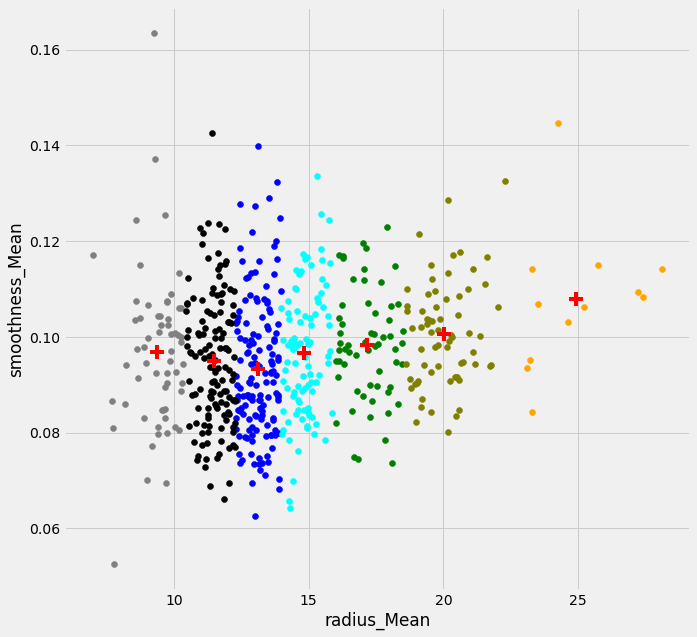

In [28]:
color=['blue','green','cyan','grey','black','olive','orange']
#color = viridis(range(7))
fig=plt.figure(figsize=(10,10))
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["radius_Mean"],data["smoothness_Mean"],c=color[k])
plt.scatter(Centroids["radius_Mean"],Centroids["smoothness_Mean"],c='red',marker='+', s=200)
plt.xlabel('radius_Mean')
plt.ylabel('smoothness_Mean')
plt.show()

## 1.2 Assignment 6B


### 7. Use k-Nearest Neighbor algorithm to classify tumors in the Wisconsin Breast Cancer Database, for k = 5, 17, 29, 41. 
Use 10-fold cross validation and report the sensitivity and specificity for each k. Choose 210 benign tumors and 210 malignant tumors randomly from the database to make up your dataset.

In [29]:
# Prepare data for Question 7 
# Replace diagnosis column with integer 1-0 values
mapping = {'M': 1., 'B': 0.}
df2 = dataset.replace({'diagnosis_M_or_B': mapping, 'diagnosis_M_or_B': mapping})
df2['diagnosis_M_or_B'] = df2['diagnosis_M_or_B'].astype(int)
df2['diagnosis_M_or_B'].dtype

# Choose 210 benign and 210 malignant tumors randomly from the database to make up new dataset
df2M = df2.loc[df2['diagnosis_M_or_B'] == 1]
df2M = df2M.sample(n=210, random_state = 2,replace=False)
df2B = df2.loc[df2['diagnosis_M_or_B'] == 0]
df2B = df2B.sample(n=210, random_state = 2,replace=False)

# Append df2B at the end of df2M dataframe 
df_KNN = df2M.append(df2B, ignore_index = True)
df_KNN = df_KNN.drop(columns=["ID"])

# Prepare X and y dataset

# Create a dataframe with all training data except the target column
X = df_KNN.drop(columns=["diagnosis_M_or_B"])

# Separate target values from 'diagnosis' column
y = df_KNN["diagnosis_M_or_B"].values

In [30]:
# Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### k-NN for k = 5, 17, 29 and 41.

In [31]:
# Based on code in https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

neighbors = [5, 17, 29, 41]

for i in neighbors:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = i)
    # Fit the classifier to the data
    knn.fit(X_train,y_train)

    #show first 5 model predictions on the test data
    knn.predict(X_test)[0:5]

    #check accuracy of our model on the test data
    knn.score(X_test, y_test)

    #create a new KNN model
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    
    #train model with cv of 10 
    cv_scores = cross_val_score(knn_cv, X, y, cv=10)
   
    #print each cv score (accuracy) and average them
    
    print('\n__________________________________________________\n')
    print('\n for k = ',i)
    print('\n cv_scores:',cv_scores)
    print("\n cv_scores mean:{}".format(np.mean(cv_scores)))

    from sklearn.model_selection import GridSearchCV
    #create new a knn model
    knn2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {"n_neighbors": np.arange(1, 25)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
    #fit model to data
    knn_gscv.fit(X, y)

    #check top performing n_neighbors value
    knn_gscv.best_params_

    #check mean score for the top performing value of n_neighbors
    knn_gscv.best_score_
    
    ##model.fit(X_train, Y_train)
    predictions = knn.predict(X_test)

    #https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
    cm1 = confusion_matrix(y_test, predictions)
    print('\n Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('\n Accuracy : ', accuracy1)

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('\n Sensitivity : ', sensitivity1 )

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('\n Specificity : ', specificity1,'\n')


__________________________________________________


 for k =  5

 cv_scores: [0.9047619  0.88095238 0.95238095 0.92857143 0.88095238 0.95238095
 0.97619048 0.92857143 0.95238095 0.88095238]

 cv_scores mean:0.9238095238095239

 Confusion Matrix : 
 [[42  0]
 [ 6 36]]

 Accuracy :  0.9285714285714286

 Sensitivity :  1.0

 Specificity :  0.8571428571428571 


__________________________________________________


 for k =  17

 cv_scores: [0.88095238 0.9047619  0.95238095 0.95238095 0.88095238 1.
 0.97619048 0.88095238 0.92857143 0.85714286]

 cv_scores mean:0.9214285714285715

 Confusion Matrix : 
 [[41  1]
 [ 5 37]]

 Accuracy :  0.9285714285714286

 Sensitivity :  0.9761904761904762

 Specificity :  0.8809523809523809 


__________________________________________________


 for k =  29

 cv_scores: [0.9047619  0.9047619  0.92857143 0.95238095 0.88095238 0.97619048
 0.95238095 0.88095238 0.9047619  0.85714286]

 cv_scores mean:0.9142857142857144

 Confusion Matrix : 
 [[42  0]
 [ 7 35

# 1 Assignment 6

## 1.1 Assignment 6A

### 4. Construct a feed-forward neural network using the three components identified in Problem 3 above.
    (a) Build networks with 2, 3 and 4 intermediate layers, each with three nodes.
    (b) Implement a back-propagation algorithm for training the network.
    (c) Perform 10-fold cross-validation to test the three networks (with 2, 3 and 4 interme-
    diate layers).
    (d) Present sensitivity and specificity for each of the three networks.

In [32]:
# We want to use  principal component analysis PCA in preprocessing neural network input data 
# We will use the 30 transformed and scaled Principal Components from the PCA Problem 3

# Convert NumPy Array to Pandas DataFrame 
df_X_pca30 = pd.DataFrame(X_pca30)

In [33]:
lst=[]
for i in range(0,30):    
    lst.append("PCA_" + str("{:02d}".format(i+1)))

df_X_pca30.columns = lst

df_NN = pd.concat([df_X_pca30[['PCA_01', 'PCA_02', 'PCA_03']].reset_index(drop=True),df2[['diagnosis_M_or_B']].reset_index(drop=True)], axis=1)
df_NN.head(1)

,PCA_01,PCA_02,PCA_03,diagnosis_M_or_B
0,2.416345,-3.763969,-0.532826,1


## Feed-forward neural network using the three components identified in Problem 3 above

### First Neural Network with FOUR intermediate layers, each with three nodes.

Using TensorFlow backend.


[2.4163454854437907, -3.7639691400935154, -0.5328255917047898] => 0 (expected 1)
[5.768398838639621, -1.0514890027896682, -0.5576765704015352] => 0 (expected 1)
[7.1118013782644525, 10.335227357136906, -3.226878006119246] => 0 (expected 1)
[3.961135263000614, -1.9465485756678989, 1.4099222690412088] => 0 (expected 1)
[2.3812709913778893, 3.97557703580761, -2.9245523659134234] => 0 (expected 1)
[2.26939376381036, -2.6780481457451146, -1.6515917518837506] => 0 (expected 1)
[2.157228024203692, 2.3592886758395752, -0.867273351313937] => 0 (expected 1)
[3.1897956396839526, 3.4280603710425064, -3.1301211934506084] => 0 (expected 1)
[6.369651509207683, 7.79639515815502, -4.388943183239618] => 0 (expected 1)
[-0.7816142047709967, -2.656966736080957, -0.5127686276110734] => 0 (expected 1)
[2.671227285747866, 0.08355820689473203, -1.5360564659683025] => 0 (expected 1)
[8.222602545172329, 2.730213108827394, 5.718604442555021] => 0 (expected 1)
[0.37029510991565256, -0.9661941175915898, 1.69862995

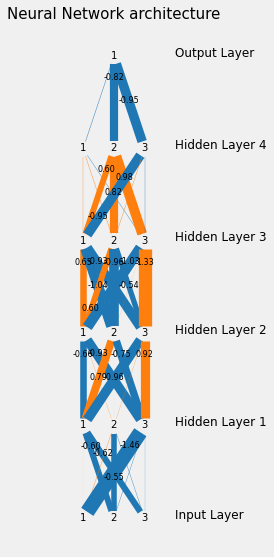

In [34]:
# code block inspired by https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# load the PCA dataframe as numpy dataset
dataset =  df_NN.to_numpy()

# split into input (X) and output (y) variables
X = dataset[:,0:3]
y = dataset[:,3]
# define the keras model
"""
Note:
The model expects rows of data with 3 PCA variables (the input_dim=3 argument)
The 1st hidden layer has 3 nodes and uses the relu activation function.
The 2nd hidden layer has 3 nodes and uses the relu activation function.
The 3rd hidden layer has 3 nodes and uses the relu activation function.
The 4th hidden layer has 3 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.
"""
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu')) #input and first hidden layer
model.add(Dense(3, activation='relu')) # second input layer
model.add(Dense(3, activation='relu')) # third input layer
model.add(Dense(3, activation='relu')) # fourth input layer
model.add(Dense(1, activation='sigmoid')) # output layer
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 25 cases
for i in range(25):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
        
    
# Visualizing feed-forward neural network trained back-propagation algorithm
# Code inspired by http://www.jzliu.net/blog/simple-python-library-visualize-neural-network/
import VisualizeNN as VisNN
from sklearn.neural_network import MLPClassifier
import numpy as np

classifier = MLPClassifier(hidden_layer_sizes=(3,3,3,3,), alpha=0.01, tol=0.001, random_state=1)
classifier.fit(X, y.ravel())

network_structure = np.hstack(([X.shape[1]], np.asarray(classifier.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, classifier.coefs_)
network.draw()

In [35]:
"""
# K-fold Cross Validation
cvscores = []
num_instances = len(X)
seed = 7
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100) 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
"""

'\n# K-fold Cross Validation\ncvscores = []\nnum_instances = len(X)\nseed = 7\nkfold = KFold(n_splits=10, random_state=1, shuffle=True)\n\n# Compile the Model\nmodel.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'acc\'])\n\n# evaluate the model\nscores = model.evaluate(X, y, verbose=0)\nprint("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))\ncvscores.append(scores[1] * 100) \nprint("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))\n'

### Second Neural Network with THREE intermediate layers, each with three nodes.

[2.4163454854437907, -3.7639691400935154, -0.5328255917047898] => 1 (expected 1)
[5.768398838639621, -1.0514890027896682, -0.5576765704015352] => 1 (expected 1)
[7.1118013782644525, 10.335227357136906, -3.226878006119246] => 1 (expected 1)
[3.961135263000614, -1.9465485756678989, 1.4099222690412088] => 1 (expected 1)
[2.3812709913778893, 3.97557703580761, -2.9245523659134234] => 1 (expected 1)
[2.26939376381036, -2.6780481457451146, -1.6515917518837506] => 1 (expected 1)
[2.157228024203692, 2.3592886758395752, -0.867273351313937] => 1 (expected 1)
[3.1897956396839526, 3.4280603710425064, -3.1301211934506084] => 1 (expected 1)
[6.369651509207683, 7.79639515815502, -4.388943183239618] => 1 (expected 1)
[-0.7816142047709967, -2.656966736080957, -0.5127686276110734] => 1 (expected 1)
[2.671227285747866, 0.08355820689473203, -1.5360564659683025] => 1 (expected 1)
[8.222602545172329, 2.730213108827394, 5.718604442555021] => 1 (expected 1)
[0.37029510991565256, -0.9661941175915898, 1.69862995

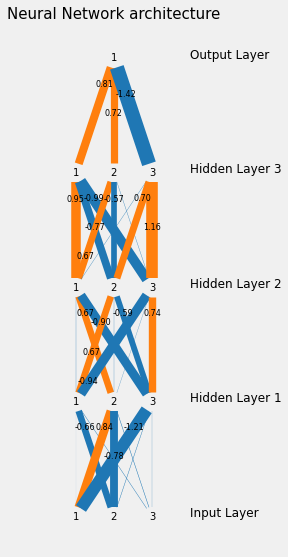

In [36]:
"""
#Your First Deep Learning Project in Python with Keras Step-By-Step
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# first neural network with keras make predictions
#from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# load the PCA dataframe as numpy dataset
dataset =  df_NN.to_numpy()

# split into input (X) and output (y) variables
X = dataset[:,0:3]
y = dataset[:,3]

# define the keras model
Note:
The model expects rows of data with 3 PCA variables (the input_dim=3 argument)
The 1st hidden layer has 3 nodes and uses the relu activation function.
The 2nd hidden layer has 3 nodes and uses the relu activation function.
The 3rd hidden layer has 3 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.
"""
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu')) #input and first hidden layer
model.add(Dense(3, activation='relu')) # second input layer
model.add(Dense(3, activation='relu')) # third input layer
model.add(Dense(1, activation='sigmoid')) # output layer
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 25 cases
for i in range(25):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
    
# Visualizing neural network
import VisualizeNN as VisNN
from sklearn.neural_network import MLPClassifier
import numpy as np

classifier = MLPClassifier(hidden_layer_sizes=(3,3,3,), alpha=0.01, tol=0.001, random_state=1)
classifier.fit(X, y.ravel())

network_structure = np.hstack(([X.shape[1]], np.asarray(classifier.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, classifier.coefs_)
network.draw()

### Third Neural Network with TWO intermediate layers, each with three nodes.

[2.4163454854437907, -3.7639691400935154, -0.5328255917047898] => 1 (expected 1)
[5.768398838639621, -1.0514890027896682, -0.5576765704015352] => 1 (expected 1)
[7.1118013782644525, 10.335227357136906, -3.226878006119246] => 1 (expected 1)
[3.961135263000614, -1.9465485756678989, 1.4099222690412088] => 1 (expected 1)
[2.3812709913778893, 3.97557703580761, -2.9245523659134234] => 1 (expected 1)
[2.26939376381036, -2.6780481457451146, -1.6515917518837506] => 1 (expected 1)
[2.157228024203692, 2.3592886758395752, -0.867273351313937] => 1 (expected 1)
[3.1897956396839526, 3.4280603710425064, -3.1301211934506084] => 1 (expected 1)
[6.369651509207683, 7.79639515815502, -4.388943183239618] => 1 (expected 1)
[-0.7816142047709967, -2.656966736080957, -0.5127686276110734] => 1 (expected 1)
[2.671227285747866, 0.08355820689473203, -1.5360564659683025] => 1 (expected 1)
[8.222602545172329, 2.730213108827394, 5.718604442555021] => 1 (expected 1)
[0.37029510991565256, -0.9661941175915898, 1.69862995

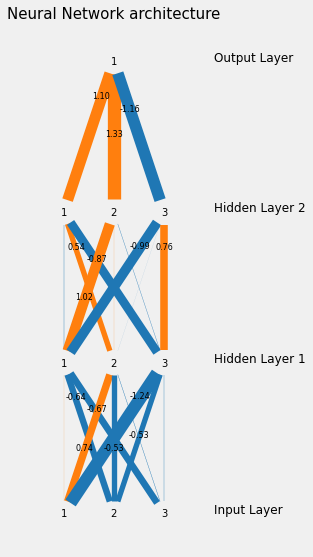

In [37]:
"""
#Your First Deep Learning Project in Python with Keras Step-By-Step
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# first neural network with keras make predictions
#from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# load the PCA dataframe as numpy dataset
dataset =  df_NN.to_numpy()

# split into input (X) and output (y) variables
X = dataset[:,0:3]
y = dataset[:,3]

# define the keras model
Note:
The model expects rows of data with 3 PCA variables (the input_dim=3 argument)
The 1st hidden layer has 3 nodes and uses the relu activation function.
The 2nd hidden layer has 3 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.
"""
model = Sequential()
model.add(Dense(3, input_dim=3, activation='relu')) #input and first hidden layer
model.add(Dense(3, activation='relu')) # second input layer
model.add(Dense(1, activation='sigmoid')) # output layer
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 25 cases
for i in range(25):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
    
# Visualizing neural network
import VisualizeNN as VisNN
from sklearn.neural_network import MLPClassifier
import numpy as np

classifier = MLPClassifier(hidden_layer_sizes=(3,3,), alpha=0.01, tol=0.001, random_state=1)
classifier.fit(X, y.ravel())

network_structure = np.hstack(([X.shape[1]], np.asarray(classifier.hidden_layer_sizes), [1]))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, classifier.coefs_)
network.draw()